# Packages and Libararies

In [ ]:
# importing the libraries

from os import listdir 
import pandas as pd
from google.colab import drive
import os
import numpy as np
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt

In [ ]:
# Connect to Google Drive
drive.mount('/content/drive')

# Direct to the correct directory'
os.chdir("drive/My Drive/SEPSIS")

# Check the files
!ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Put all timeseries in one single file

a_traincsv = listdir('training/')

with open("makegraphs.psv", "wb") as fout:
    for i, csv in enumerate(a_traincsv):
        print(i)
        # first file 
        if i == 0:
            with open('training/'+ csv, "rb") as f:
                fout.write(f.read())
        # Now the rest 
        with open('training/'+csv, "rb") as f:
            next(f) # skip the header 
            fout.write(f.read())

Streaming output truncated to the last 5000 lines.
15337
15338
15339
15340
15341
15342
15343
15344
15345
15346
15347
15348
15349
15350
15351
15352
15353
15354
15355
15356
15357
15358
15359
15360
15361
15362
15363
15364
15365
15366
15367
15368
15369
15370
15371
15372
15373
15374
15375
15376
15377
15378
15379
15380
15381
15382
15383
15384
15385
15386
15387
15388
15389
15390
15391
15392
15393
15394
15395
15396
15397
15398
15399
15400
15401
15402
15403
15404
15405
15406
15407
15408
15409
15410
15411
15412
15413
15414
15415
15416
15417
15418
15419
15420
15421
15422
15423
15424
15425
15426
15427
15428
15429
15430
15431
15432
15433
15434
15435
15436
15437
15438
15439
15440
15441
15442
15443
15444
15445
15446
15447
15448
15449
15450
15451
15452
15453
15454
15455
15456
15457
15458
15459
15460
15461
15462
15463
15464
15465
15466
15467
15468
15469
15470
15471
15472
15473
15474
15475
15476
15477
15478
15479
15480
15481
15482
15483
15484
15485
15486
15487
15488
15489
15490
15491
15492
15493
15494
1

In [ ]:
# Show total amount of timesteps from all the times eries data

train = pd.read_csv("makegraphs.psv", sep='|')
train.shape

(790267, 41)

In [ ]:
# Show columns

train.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')

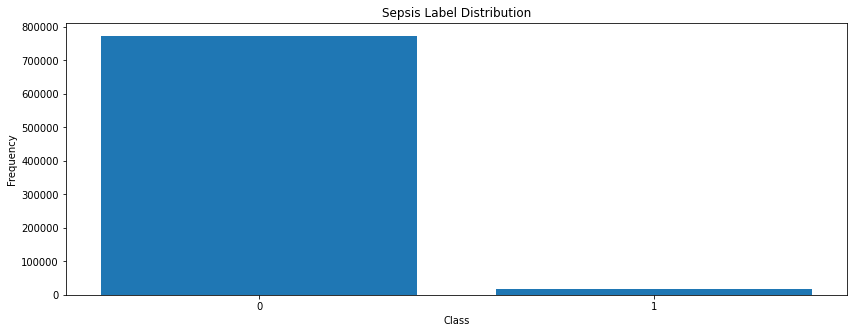

In [ ]:
# Make a bar plot of label distribution for all timesteps

rcParams['figure.figsize'] = 14, 5


plt.bar(train['SepsisLabel'].value_counts().index,
        train['SepsisLabel'].value_counts())
plt.xticks([0,1])
plt.xlabel('Class')
plt.title('Sepsis Label Distribution')
_ = plt.ylabel('Frequency')

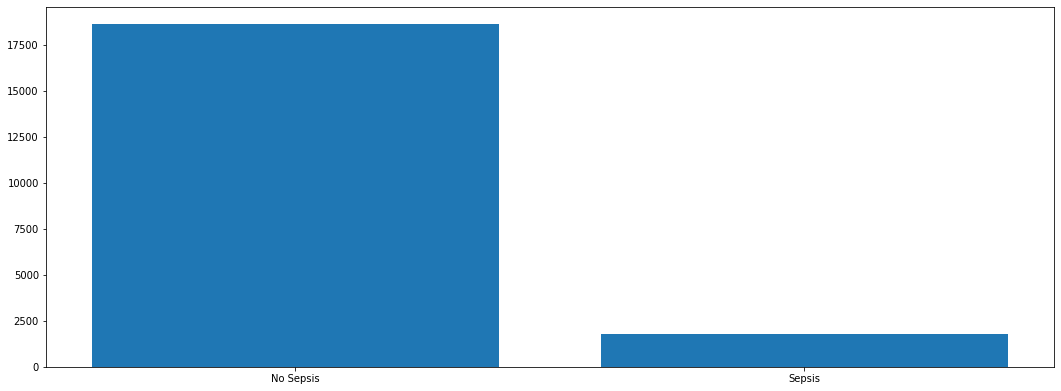

In [ ]:
# Make a bar plot of label distribution for all time series data

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['No Sepsis', 'Sepsis']
students = [18645,1790]
ax.bar(langs,students)
plt.show()

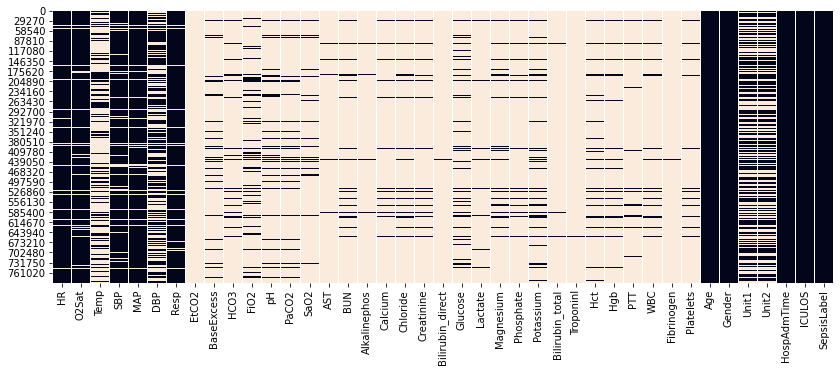

In [ ]:
# check for null in features/independent variables 
sns.heatmap(train.isnull(), cbar=False)

In [ ]:
# The percentages of missing data

missing = (train .isnull().sum() / train .shape[0])*100
missing

HR                    7.742826
O2Sat                12.031250
Temp                 66.224833
SBP                  15.210176
MAP                  10.231732
DBP                  48.129177
Resp                  9.776190
EtCO2               100.000000
BaseExcess           89.575169
HCO3                 91.949556
FiO2                 85.807708
pH                   88.533243
PaCO2                91.231951
SaO2                 95.044713
AST                  98.504303
BUN                  91.840859
Alkalinephos         98.540746
Calcium              95.024340
Chloride             91.676231
Creatinine           93.357941
Bilirubin_direct     99.850430
Glucose              87.768817
Lactate              96.565212
Magnesium            92.219845
Phosphate            94.951200
Potassium            89.137975
Bilirubin_total      98.773453
TroponinI            99.877889
Hct                  88.224107
Hgb                  91.164505
PTT                  95.152398
WBC                  92.489753
Fibrinog

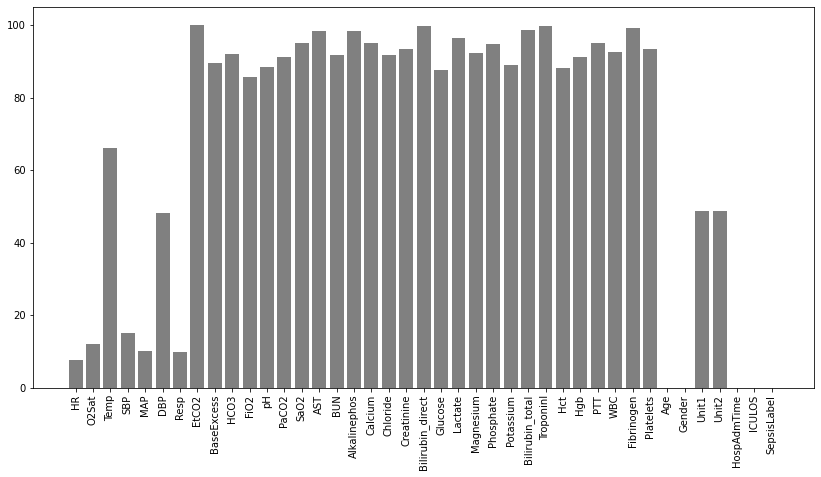

In [ ]:
# Graph overview of missing data

rcParams['figure.figsize'] = 14,7
_ = plt.bar(missing.index, missing, color='grey')
_ = plt.xticks(missing.index, rotation=90)